In [164]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import hvplot.pandas
import requests
import time
from scipy import stats

In [165]:
csv_file = "outdoor-pollution-death-rate.csv"
outdoor_df = pd.read_csv(csv_file)

In [166]:
outdoor_df.head()

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,37.40
1,Afghanistan,AFG,1991,36.10
2,Afghanistan,AFG,1992,35.13
3,Afghanistan,AFG,1993,35.29
4,Afghanistan,AFG,1994,35.88


In [167]:
# inf_mor_clean = infant_mortality_clean_df[["Location","Period","Dim1","FactValueNumeric"]]
countries = ["JPN", "USA","CHN","RUS","IND","DEU","ZAF","GBR","ISR","AUS","BRA"]
outdoor_df = outdoor_df.loc[(outdoor_df["Code"].isin(countries)) &
                                                          (outdoor_df["Year"] > 2009) &
                                                          (outdoor_df["Year"] < 2019)] 

outdoor_df

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: Age-standardized (Rate)
320,Australia,AUS,2010,4.87
321,Australia,AUS,2011,4.75
322,Australia,AUS,2012,4.61
323,Australia,AUS,2013,4.53
324,Australia,AUS,2014,4.51
...,...,...,...,...
6354,United States,USA,2014,12.53
6355,United States,USA,2015,12.00
6356,United States,USA,2016,11.32
6357,United States,USA,2017,10.69


In [168]:
outdoor_df = outdoor_df[["Entity","Year","Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: Age-standardized (Rate)"]]
outdoor_df

,Entity,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: Age-standardized (Rate)
320,Australia,2010,4.87
321,Australia,2011,4.75
322,Australia,2012,4.61
323,Australia,2013,4.53
324,Australia,2014,4.51
...,...,...,...
6354,United States,2014,12.53
6355,United States,2015,12.00
6356,United States,2016,11.32
6357,United States,2017,10.69


In [169]:
outdoor_df = outdoor_df.rename(columns={
    "Entity": "Country name",
    "Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: Age-standardized (Rate)": "Outdoor Air Pollution Death Rate"
    })
outdoor_df

,Country name,Year,Outdoor Air Pollution Death Rate
320,Australia,2010,4.87
321,Australia,2011,4.75
322,Australia,2012,4.61
323,Australia,2013,4.53
324,Australia,2014,4.51
...,...,...,...
6354,United States,2014,12.53
6355,United States,2015,12.00
6356,United States,2016,11.32
6357,United States,2017,10.69


In [170]:
outdoor_df = outdoor_df.reset_index(drop=True)
outdoor_df

,Country name,Year,Outdoor Air Pollution Death Rate
0,Australia,2010,4.87
1,Australia,2011,4.75
2,Australia,2012,4.61
3,Australia,2013,4.53
4,Australia,2014,4.51
...,...,...,...
94,United States,2014,12.53
95,United States,2015,12.00
96,United States,2016,11.32
97,United States,2017,10.69


In [171]:
outdoor_df["Country name"].unique()

array(['Australia', 'Brazil', 'China', 'Germany', 'India', 'Israel',
       'Japan', 'Russia', 'South Africa', 'United Kingdom',
       'United States'], dtype=object)

In [172]:
# define colors
country_colors = {
    "Australia":"orange",
    "Brazil":"olivedrab",
    "China":"red",
    "Germany":"darkgoldenrod",
    "India":"gold",
    "Israel":"turquoise",
    "Japan":"hotpink",
    "Russia":"grey",
    "South Africa":"mediumpurple",
    "United Kingdom":"navy",
    "United States":"royalblue"
    };

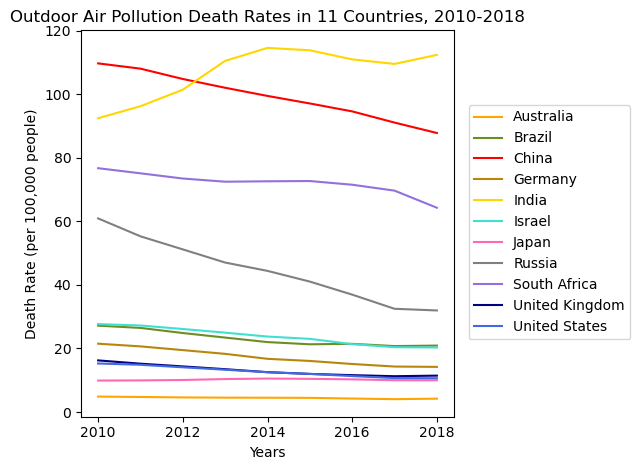

In [173]:
# line graph: x-axis: years 2010-2018, y-axis: GDP, separate color line for each country
countries_2 = [
    "Australia",
    "Brazil",
    "China",
    "Germany",
    "India",
    "Israel",
    "Japan",
    "Russia",
    "South Africa",
    "United Kingdom",
    "United States"
]

for country in countries_2:
    df_inf_mor = outdoor_df[outdoor_df["Country name"] == country]
    pollution_plot = plt.plot(df_inf_mor["Year"], df_inf_mor["Outdoor Air Pollution Death Rate"], label=country, color=country_colors[country])


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc=(1.04, 0.2))

# Labels
plt.title("Outdoor Air Pollution Death Rates in 11 Countries, 2010-2018") #"The number of deaths attributed to outdoor ozone and particulate matter pollution per 100,000")
plt.xlabel("Years")
plt.ylabel("Death Rate (per 100,000 people)")

# Saves an image of our chart so that we can view it in a folder, make room for the legend
plt.savefig("Images/Outdoor_Air_Pollution_Death_Rate.png", bbox_inches='tight')

plt.tight_layout()
# Print our chart to the screen
plt.show()

# Cancer Death Rates

In [174]:
cancer_csv_file = "cancer-death-rates.csv"
cancer_df = pd.read_csv(cancer_csv_file)
cancer_df.head()

,Entity,Code,Year,Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,159.96
1,Afghanistan,AFG,1991,158.46
2,Afghanistan,AFG,1992,157.39
3,Afghanistan,AFG,1993,157.57
4,Afghanistan,AFG,1994,158.03


In [175]:
# inf_mor_clean = infant_mortality_clean_df[["Location","Period","Dim1","FactValueNumeric"]]
countries = ["JPN", "USA","CHN","RUS","IND","DEU","ZAF","GBR","ISR","AUS","BRA"]
cancer_filter_df = cancer_df.loc[(cancer_df["Code"].isin(countries)) &
                                                          (cancer_df["Year"] > 2009) &
                                                          (cancer_df["Year"] < 2019)] 

cancer_filter_df.head()

,Entity,Code,Year,Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)
320,Australia,AUS,2010,132.97
321,Australia,AUS,2011,131.92
322,Australia,AUS,2012,129.56
323,Australia,AUS,2013,128.31
324,Australia,AUS,2014,128.08


In [176]:
cancer_filter_df = cancer_filter_df[["Entity","Year","Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)"]]

# Df.rename(columns={ }) 
cancer_rename_df = cancer_filter_df.rename(columns={
    "Entity": "Country name",
    "Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)": "Annual Death Rate from Cancer"
    })

cancer_rename_df.head()

,Country name,Year,Annual Death Rate from Cancer
320,Australia,2010,132.97
321,Australia,2011,131.92
322,Australia,2012,129.56
323,Australia,2013,128.31
324,Australia,2014,128.08


In [177]:
cancer_reset_df = cancer_rename_df.reset_index(drop=True)
cancer_reset_df

,Country name,Year,Annual Death Rate from Cancer
0,Australia,2010,132.97
1,Australia,2011,131.92
2,Australia,2012,129.56
3,Australia,2013,128.31
4,Australia,2014,128.08
...,...,...,...
94,United States,2014,137.31
95,United States,2015,136.43
96,United States,2016,136.36
97,United States,2017,135.26


In [178]:
cancer_reset_df["Country name"].unique()

array(['Australia', 'Brazil', 'China', 'Germany', 'India', 'Israel',
       'Japan', 'Russia', 'South Africa', 'United Kingdom',
       'United States'], dtype=object)

In [179]:
# define colors
country_colors = {
    "Australia":"orange",
    "Brazil":"olivedrab",
    "China":"red",
    "Germany":"darkgoldenrod",
    "India":"gold",
    "Israel":"turquoise",
    "Japan":"hotpink",
    "Russia":"grey",
    "South Africa":"mediumpurple",
    "United Kingdom":"navy",
    "United States":"royalblue"
    };

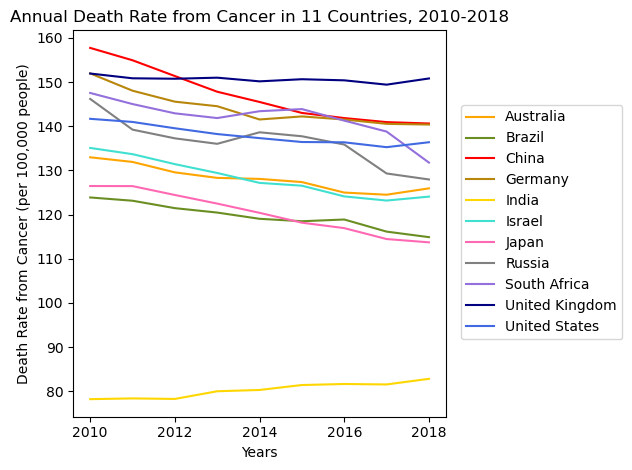

In [180]:
# line graph: x-axis: years 2010-2018, y-axis: GDP, separate color line for each country
countries_2 = [
    "Australia",
    "Brazil",
    "China",
    "Germany",
    "India",
    "Israel",
    "Japan",
    "Russia",
    "South Africa",
    "United Kingdom",
    "United States"
]

for country in countries_2:
    df_inf_mor = cancer_reset_df[cancer_reset_df["Country name"] == country]
    cancer_plot = plt.plot(df_inf_mor["Year"], df_inf_mor["Annual Death Rate from Cancer"], label=country, color=country_colors[country])


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc=(1.04, 0.2))

# Labels
plt.title("Annual Death Rate from Cancer in 11 Countries, 2010-2018")
plt.xlabel("Years")
plt.ylabel("Death Rate from Cancer (per 100,000 people)")

# Saves an image of our chart so that we can view it in a folder, make room for the legend
plt.savefig("Images/Annual_Death_Rate_from_Cancer.png", bbox_inches='tight')

plt.tight_layout()
# Print our chart to the screen
plt.show()

In [181]:
#DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, 
#right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

merge_df = pd.merge(outdoor_df,cancer_reset_df,how='outer',on=["Country name","Year"])
merge_df

,Country name,Year,Outdoor Air Pollution Death Rate,Annual Death Rate from Cancer
0,Australia,2010,4.87,132.97
1,Australia,2011,4.75,131.92
2,Australia,2012,4.61,129.56
3,Australia,2013,4.53,128.31
4,Australia,2014,4.51,128.08
...,...,...,...,...
94,United States,2014,12.53,137.31
95,United States,2015,12.00,136.43
96,United States,2016,11.32,136.36
97,United States,2017,10.69,135.26


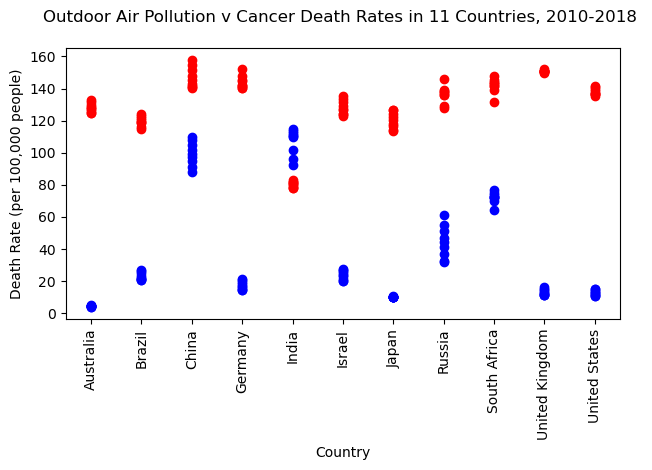

In [182]:
# line graph: x-axis: years 2010-2018, y-axis: GDP, separate color line for each country

for country in countries_2:
    merge_graph = merge_df[merge_df["Country name"] == country]
    plt.scatter(merge_graph["Country name"],merge_graph["Outdoor Air Pollution Death Rate"], color="Blue")
    plt.scatter(merge_graph["Country name"],merge_graph["Annual Death Rate from Cancer"], color="Red")
    plt.xticks(rotation=90)

    
# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc=(1.04, 0.2))

# Labels
plt.title("Outdoor Air Pollution v Cancer Death Rates in 11 Countries, 2010-2018 \n")
plt.xlabel("Country")
plt.ylabel("Death Rate (per 100,000 people)")

# Saves an image of our chart so that we can view it in a folder, make room for the legend
plt.savefig("Images/Air_Cancer_Correlation.png", bbox_inches='tight')

plt.tight_layout()
# Print our chart to the screen
plt.show()

# Cardiovasculare Disease Death Rates

In [183]:
# csv_file = "outdoor-pollution-death-rate.csv"
# outdoor_df = pd.read_csv(csv_file)
cardio_file = "cardiovascular-disease-death-rates.csv"
cardio_df = pd.read_csv(cardio_file)
cardio_df.head()

,Entity,Code,Year,Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,716.27
1,Afghanistan,AFG,1991,711.20
2,Afghanistan,AFG,1992,708.28
3,Afghanistan,AFG,1993,712.87
4,Afghanistan,AFG,1994,720.74


In [184]:
countries = ["JPN", "USA","CHN","RUS","IND","DEU","ZAF","GBR","ISR","AUS","BRA"]
cardio_filter_df = cardio_df.loc[(cardio_df["Code"].isin(countries)) &
                                                          (cardio_df["Year"] > 2009) &
                                                          (cardio_df["Year"] < 2019)] 

cardio_filter_df.head()

,Entity,Code,Year,Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)
320,Australia,AUS,2010,124.42
321,Australia,AUS,2011,120.57
322,Australia,AUS,2012,115.19
323,Australia,AUS,2013,111.24
324,Australia,AUS,2014,110.03


In [185]:
cardio_filter_df = cardio_filter_df[["Entity","Year","Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)"]]

# Df.rename(columns={ }) 
cardio_rename_df = cardio_filter_df.rename(columns={
    "Entity": "Country name",
    "Deaths - Cardiovascular diseases - Sex: Both - Age: Age-standardized (Rate)": "Annual Death Rate from Cardiovascular Disease"
    })

cardio_rename_df.head()

,Country name,Year,Annual Death Rate from Cardiovascular Disease
320,Australia,2010,124.42
321,Australia,2011,120.57
322,Australia,2012,115.19
323,Australia,2013,111.24
324,Australia,2014,110.03


In [186]:
cardio_reset_df = cardio_rename_df.reset_index(drop=True)
cardio_reset_df

,Country name,Year,Annual Death Rate from Cardiovascular Disease
0,Australia,2010,124.42
1,Australia,2011,120.57
2,Australia,2012,115.19
3,Australia,2013,111.24
4,Australia,2014,110.03
...,...,...,...
94,United States,2014,156.65
95,United States,2015,156.50
96,United States,2016,156.35
97,United States,2017,154.31


In [187]:
cardio_reset_df["Country name"].unique()

array(['Australia', 'Brazil', 'China', 'Germany', 'India', 'Israel',
       'Japan', 'Russia', 'South Africa', 'United Kingdom',
       'United States'], dtype=object)

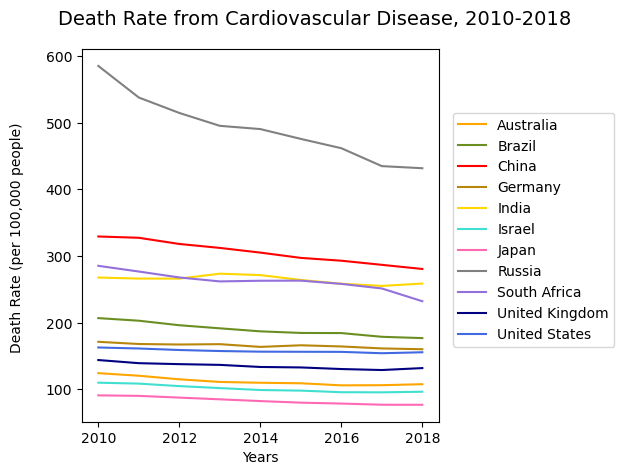

In [188]:
for country in countries_2:
    cardio_graph = cardio_reset_df[cardio_reset_df["Country name"] == country]
    cardio_plot = plt.plot(cardio_graph["Year"], cardio_graph["Annual Death Rate from Cardiovascular Disease"], label=country, color=country_colors[country])


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc=(1.04, 0.2))

# Labels
## Add suptitle above the title
#plt.suptitle("A 2D histogram\n", fontsize=18, y=1.02)
# Add title
#plt.title("Realized by the Python Graph Gallery", color="grey", style='italic')
plt.suptitle("Death Rate from Cardiovascular Disease, 2010-2018", fontsize=14)# y=1.02)
#plt.title("Annual number of deaths from cardiovascular disease per 100,000 people\n", color="grey", style='italic',fontsize=10)
plt.xlabel("Years")
plt.ylabel("Death Rate (per 100,000 people) \n")

# Saves an image of our chart so that we can view it in a folder, make room for the legend
plt.savefig("Images/Annual_Death_Rate_from_CardioDisease.png", bbox_inches='tight')

plt.tight_layout()
# Print our chart to the screen
plt.show()

In [189]:
merge_df

,Country name,Year,Outdoor Air Pollution Death Rate,Annual Death Rate from Cancer
0,Australia,2010,4.87,132.97
1,Australia,2011,4.75,131.92
2,Australia,2012,4.61,129.56
3,Australia,2013,4.53,128.31
4,Australia,2014,4.51,128.08
...,...,...,...,...
94,United States,2014,12.53,137.31
95,United States,2015,12.00,136.43
96,United States,2016,11.32,136.36
97,United States,2017,10.69,135.26


In [190]:
merge_all_df = pd.merge(merge_df,cardio_reset_df,how='outer',on=["Country name","Year"])
merge_all_df

,Country name,Year,Outdoor Air Pollution Death Rate,Annual Death Rate from Cancer,Annual Death Rate from Cardiovascular Disease
0,Australia,2010,4.87,132.97,124.42
1,Australia,2011,4.75,131.92,120.57
2,Australia,2012,4.61,129.56,115.19
3,Australia,2013,4.53,128.31,111.24
4,Australia,2014,4.51,128.08,110.03
...,...,...,...,...,...
94,United States,2014,12.53,137.31,156.65
95,United States,2015,12.00,136.43,156.50
96,United States,2016,11.32,136.36,156.35
97,United States,2017,10.69,135.26,154.31


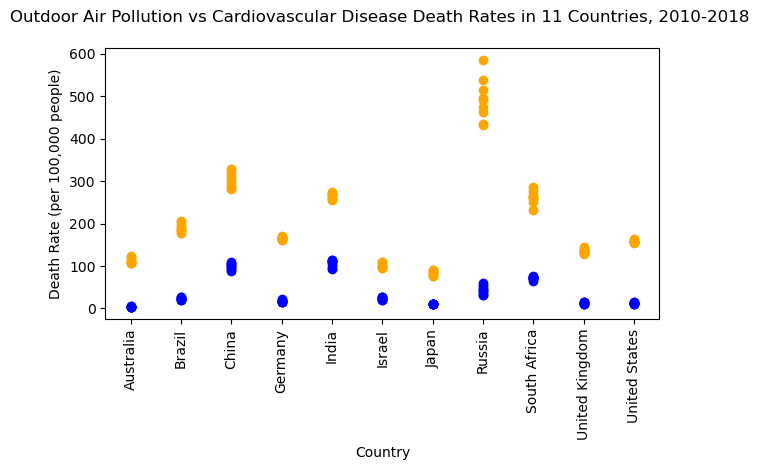

In [191]:
for country in countries_2:
    merge_all_graph = merge_all_df[merge_all_df["Country name"] == country]
    plt.scatter(merge_all_graph["Country name"],merge_all_graph["Outdoor Air Pollution Death Rate"],label="Outdoor Air Pollution", color="Blue")
    plt.scatter(merge_all_graph["Country name"],merge_all_graph["Annual Death Rate from Cardiovascular Disease"],label="Cardiovascular Death Rate", color="Orange")
    plt.xticks(rotation=90)

    
# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc=(1.04, 0.2))

# Labels
plt.title("Outdoor Air Pollution vs Cardiovascular Disease Death Rates in 11 Countries, 2010-2018 \n")
plt.xlabel("Country")
plt.ylabel("Death Rate (per 100,000 people)")

# Saves an image of our chart so that we can view it in a folder, make room for the legend
plt.savefig("Images/Air_Cardio_Correlation.png", bbox_inches='tight')

plt.tight_layout()
# Print our chart to the screen
plt.show()

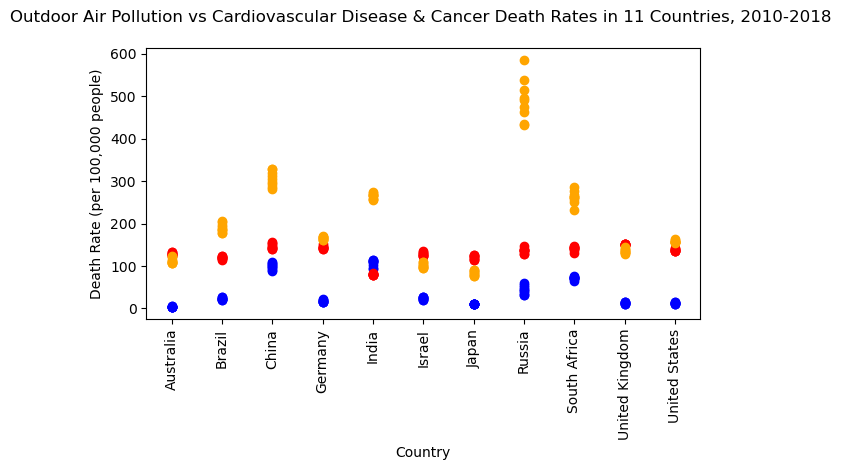

In [192]:
for country in countries_2:
    merge_all_graph = merge_all_df[merge_all_df["Country name"] == country]
    plt.scatter(merge_all_graph["Country name"],merge_all_graph["Outdoor Air Pollution Death Rate"],label="Outdoor Air Pollution", color="Blue")
    plt.scatter(merge_all_graph["Country name"],merge_all_graph["Annual Death Rate from Cancer"], color="Red")
    plt.scatter(merge_all_graph["Country name"],merge_all_graph["Annual Death Rate from Cardiovascular Disease"],label="Cardiovascular Death Rate", color="Orange")
    plt.xticks(rotation=90)

    
# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc=(1.04, 0.2))

# Labels
plt.title("Outdoor Air Pollution vs Cardiovascular Disease & Cancer Death Rates in 11 Countries, 2010-2018 \n")
plt.xlabel("Country")
plt.ylabel("Death Rate (per 100,000 people)")

# Saves an image of our chart so that we can view it in a folder, make room for the legend
plt.savefig("Images/Air_Cardio_Cancer_Correlation.png", bbox_inches='tight')

plt.tight_layout()
# Print our chart to the screen
plt.show()